In [4]:
#Disciplina: Solucoes em Mineracao de dados
#--------------------------------------------------------
#Script para a analise exploratoria dos dados (AED)
#--------------------------------------------------------

# Importando as bibliotecas necessarias

!pip3 install xlrd

import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 KB 1.9 MB/s eta 0:00:002.0 MB/s eta 0:00:01


In [8]:
file_path = "./default of credit card clients.xls"

df = pandas.read_excel(file_path, header = 1)

# Características dos dados

## Shape dos dados

In [18]:
shape = df.shape
print(f"Registros: {shape[0]}")
print(f"Atributos: {shape[1]}")

columns = list(df.columns)
print("Colunas:", columns)

Registros: 30000
Atributos: 25
Colunas: ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']


25

## Head

In [10]:
df.head()

Visualizando o conjunto inicial (head) dos dados, ou mais claramente, os 5 primeiros registros (head(5))


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [30]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

## Descrição

In [11]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Distribuição das labels

In [13]:
df.groupby('default payment next month').size()

default payment next month
0    23364
1     6636
dtype: int64

## Procurando valores únicos

In [27]:
for column in columns:
    dist = df.groupby(column).size()
    for row in dist:
        if row == 1:
            print(column)
            break


ID
LIMIT_BAL
AGE
PAY_2
PAY_5
BILL_AMT1
BILL_AMT2
BILL_AMT3
BILL_AMT4
BILL_AMT5
BILL_AMT6
PAY_AMT1
PAY_AMT2
PAY_AMT3
PAY_AMT4
PAY_AMT5
PAY_AMT6


## Contagem de dados ausentes

In [23]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

# Gráficos

## Distribuição das labels

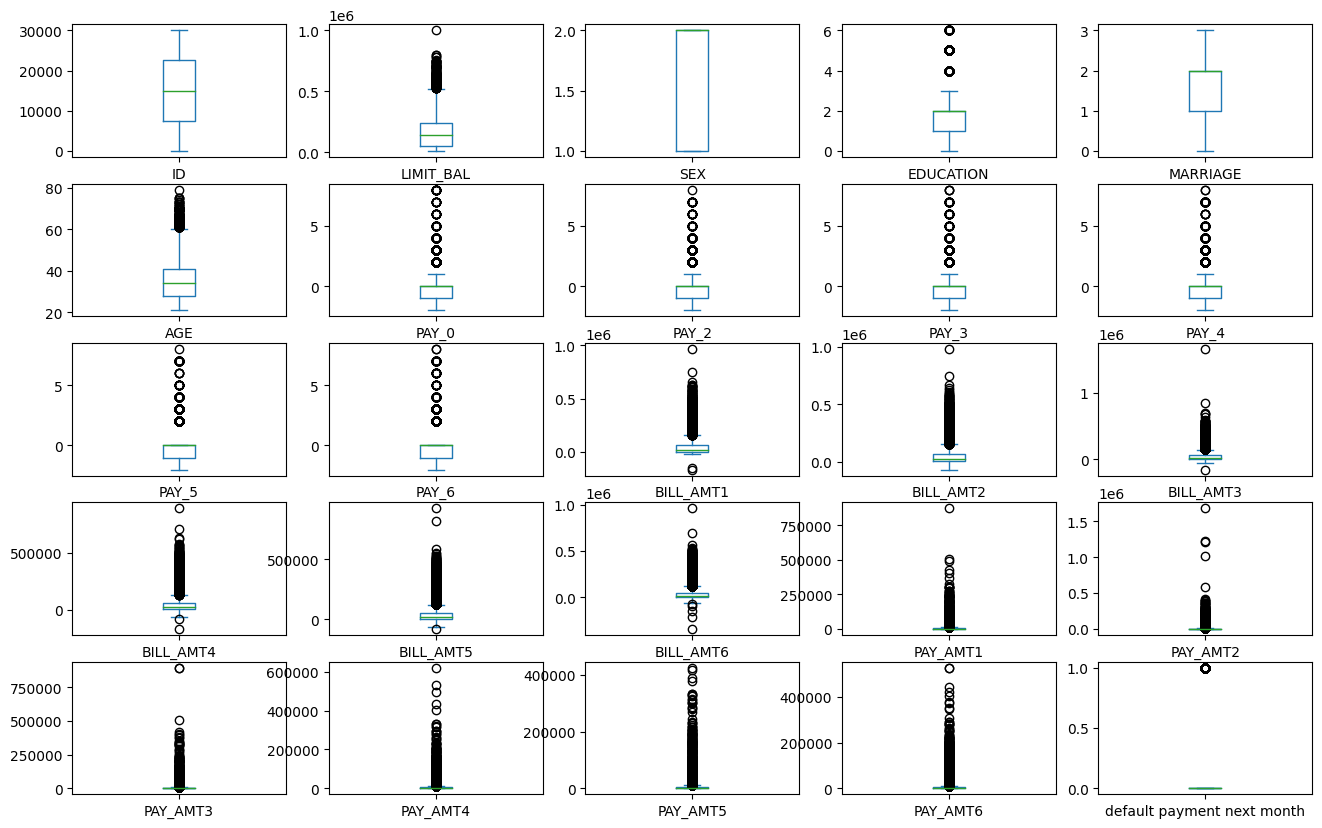

In [24]:
df.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False)
plt.show()

## Histogramas a partir das labels

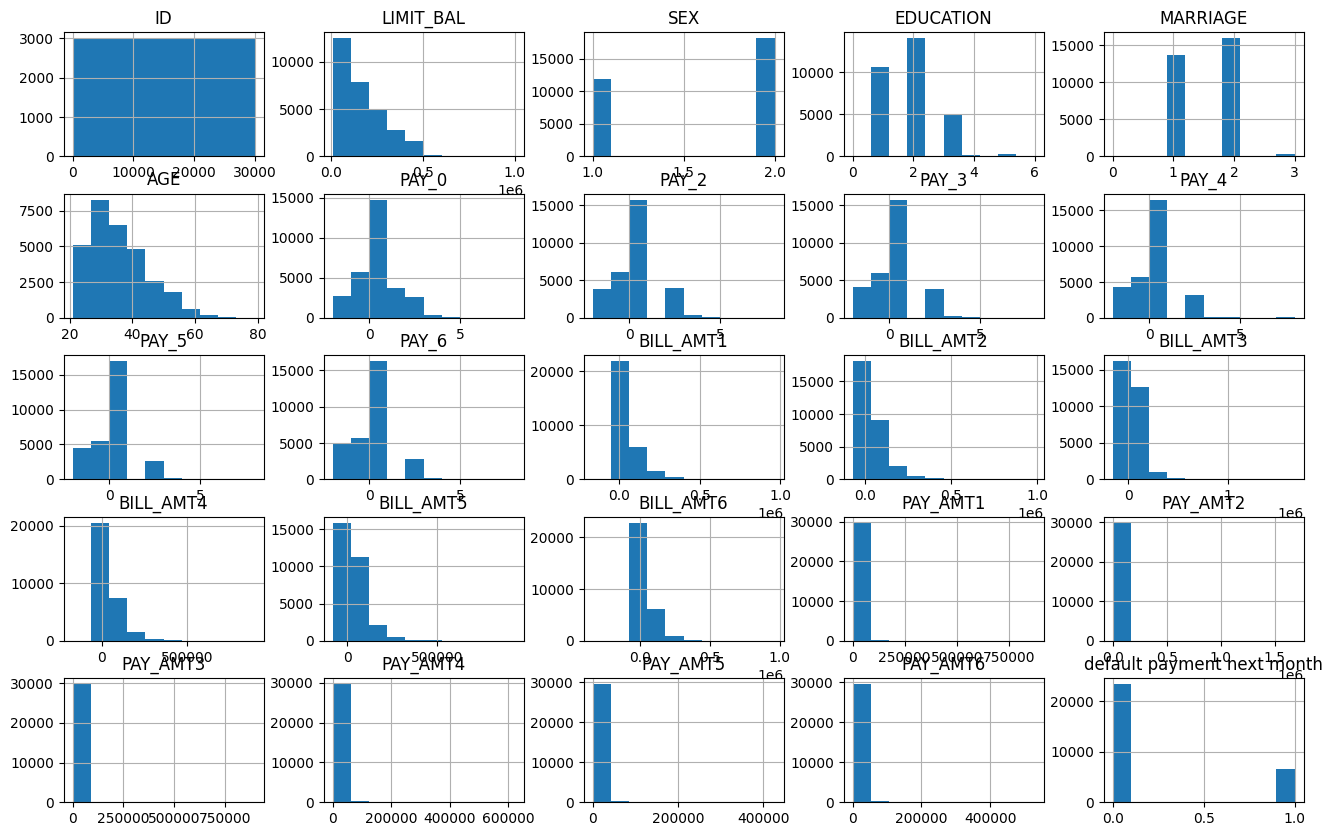

In [21]:
df.hist()
plt.show()

## Gráficos de dispersão

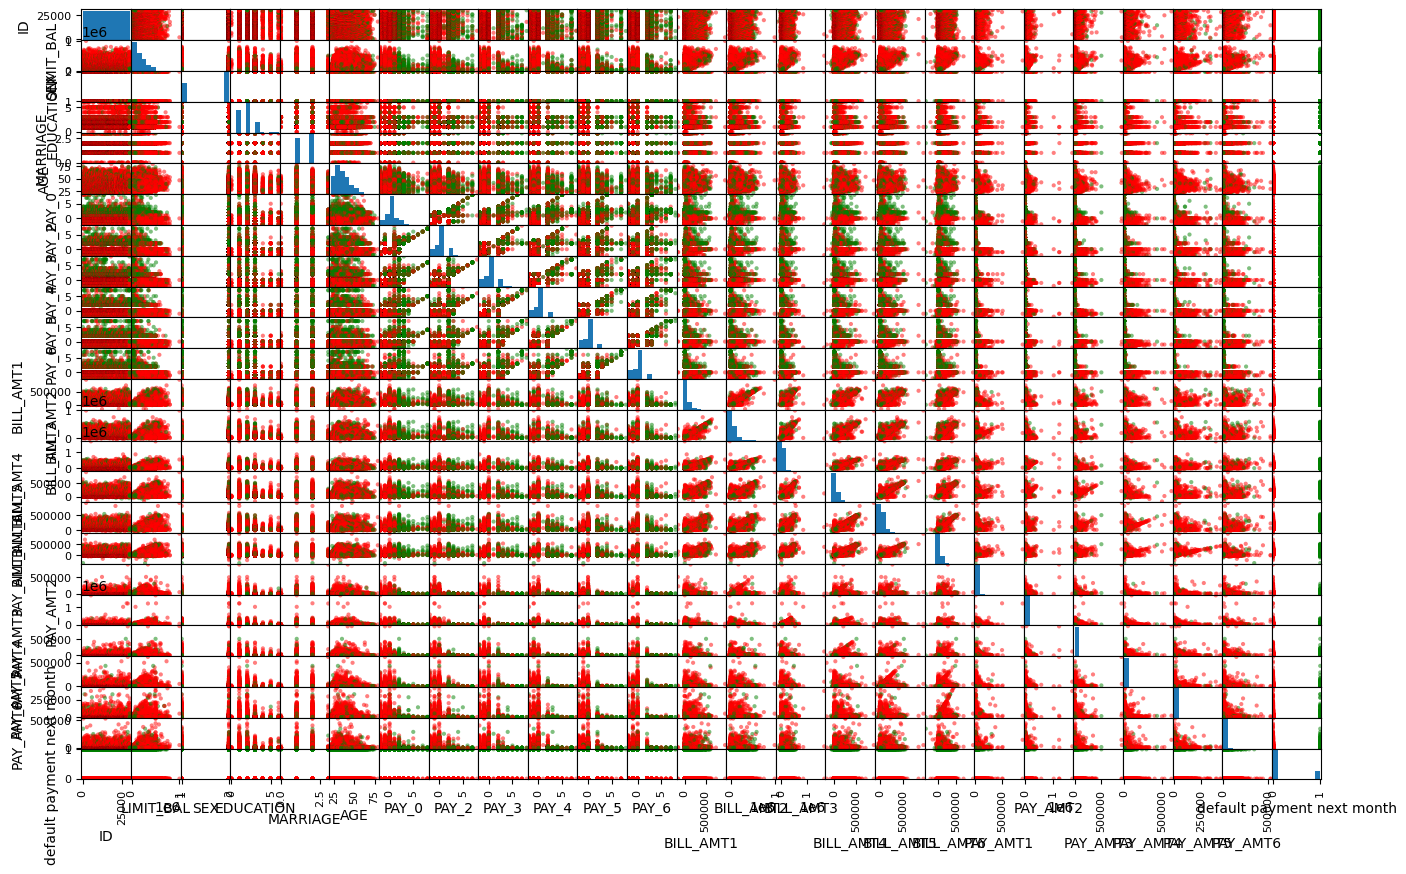

In [22]:
colors_palette = {0: 'red', 1: 'green'}
colors = [colors_palette[c] for c in df['default payment next month']]
scatter_matrix(df, c=colors)
plt.show()

# Questionamentos

- Quantos atributos existem na base de dados?

25
- Quantos registros?

30000
- Quantos atributos são categóricos e quantos são numéricos?

11 atributos categóricos:

ID, SEX, EDUCATION, MARRIAGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, default payment next month


14 atributos numéricos:

LIMIT_BAL, AGE, BILL_AMT (1 a 6), PAY_AMT (1 a 6)
- Analisar as correlações entre atributo.
PAY_0 indica o status do pagamento para o mês que representa.
BILL_AMT_0 indica o valor do pagamento para o mês que representa.
PAY_AMT_0 indica quanto o indivíduo já pagou até o mês que representa.

A mesma lógica segue para os demais PAY'S, BILL_AMT's e PAY_AMT's.

- Existem atributos sugestivos para remoção de outliers?

Sim. Ao observar os box-plots dos atributos, podemos ver que vários apresentam outliers. Em especial os BILL_AMT e PAY_AMT, assim como o LIMIT_BAL e AGE.
- Existem atributos com valores únicos?

Sim, o atributo ID, logo de cara. Um script foi usado também para identificar todos os atributos com ao menos um valor único, e essas foram as colunas apontadas:
ID
LIMIT_BAL
AGE
PAY_2
PAY_5
BILL_AMT1
BILL_AMT2
BILL_AMT3
BILL_AMT4
BILL_AMT5
BILL_AMT6
PAY_AMT1
PAY_AMT2
PAY_AMT3
PAY_AMT4
PAY_AMT5
PAY_AMT6
- Existem atributos com valores faltantes? Se sim, quais e quantos % de valores faltantes?

Não, ao menos não existe nenhum registro com um NaN.
- Algum atributo necessita de tratamento nos dados específico?

Alguns métodos poderiam ser aplicados, como normalizar os dados numéricos entre 1 e 0, discretizá-los, ou aplicar one-hot-encoding para os dados categóricos.
- É possível apontar algo a partir do gráfico de dispersão?
